<a href="https://colab.research.google.com/github/theclosedbook/TensorFlow/blob/main/03_into_to_compuetr_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Convolutional Neural Networks and Computer Vison with TensorFlow

Computer Vison is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front.
What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

    Getting a dataset to work with
    Architecture of a convolutional neural network
    A quick end-to-end example (what we're working towards)
    Steps in modelling for binary image classification with CNNs
        Becoming one with the data
        Preparing data for modelling
        Creating a CNN model (starting with a baseline)
        Fitting a model (getting it to find patterns in our data)
        Evaluating a model
        Improving a model
        Making a prediction with a trained model
    Steps in modelling for multi-class image classification with CNNs
    Same as above (but this time with a different dataset)


## Get the data

The images we're working on is the Food 101 dataset.

However we've modified it to only two classes i.e. Pizza and Steak

**Note**: We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what dosen't work ) before scalling up

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-02-05 15:52:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.207, 108.177.127.207, 172.217.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.9MB/s    in 3.2s    

2024-02-05 15:52:22 (32.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learinng project is becoming one with the data.
And for a computer vision project... this usually means visulizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os
# Walk through pizza_steak directory and list the number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# Another way to find put how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visulaize our images, first let's get the class names programatically

In [7]:
# get the class names programatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



Image shape: (512, 512, 3)


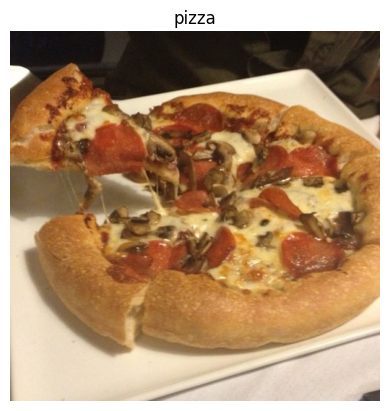

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 14,  12,  17],
        [ 16,  14,  19],
        [ 20,  18,  23],
        ...,
        [ 37,  28,  19],
        [ 40,  31,  22],
        [ 44,  35,  26]],

       [[ 18,  16,  21],
        [ 20,  18,  23],
        [ 21,  19,  24],
        ...,
        [ 36,  27,  18],
        [ 39,  30,  21],
        [ 42,  33,  24]],

       [[ 23,  20,  27],
        [ 24,  21,  28],
        [ 23,  21,  26],
        ...,
        [ 37,  28,  19],
        [ 38,  29,  20],
        [ 40,  31,  22]],

       ...,

       [[140, 119,  98],
        [149, 128, 107],
        [172, 151, 130],
        ...,
        [ 79,  69,  67],
        [ 82,  72,  71],
        [ 86,  76,  75]],

       [[137, 116,  95],
        [147, 126, 105],
        [169, 148, 127],
        ...,
        [ 82,  73,  68],
        [ 82,  72,  70],
        [ 83,  73,  71]],

       [[135, 114,  93],
        [145, 124, 103],
        [167, 146, 125],
        ...,
        [ 83,  74,  6

In [11]:
# View the image shape
img.shape # returns width , height , color channels

(512, 512, 3)

**Note**: As we've discussed before, many machine learning moels, including neural networks prefer the va;ues they work with to be between 0&1. Knowing this, one of the most common preprocessing steps for working woth the images is to scale (also reffered to as **normalize**) their pixel values by dividing the image array by 255.(Since 255 is the maximum pixel value).

In [12]:
# Get all the pizel values b/w 0&1
img/255.0

array([[[0.05490196, 0.04705882, 0.06666667],
        [0.0627451 , 0.05490196, 0.0745098 ],
        [0.07843137, 0.07058824, 0.09019608],
        ...,
        [0.14509804, 0.10980392, 0.0745098 ],
        [0.15686275, 0.12156863, 0.08627451],
        [0.17254902, 0.1372549 , 0.10196078]],

       [[0.07058824, 0.0627451 , 0.08235294],
        [0.07843137, 0.07058824, 0.09019608],
        [0.08235294, 0.0745098 , 0.09411765],
        ...,
        [0.14117647, 0.10588235, 0.07058824],
        [0.15294118, 0.11764706, 0.08235294],
        [0.16470588, 0.12941176, 0.09411765]],

       [[0.09019608, 0.07843137, 0.10588235],
        [0.09411765, 0.08235294, 0.10980392],
        [0.09019608, 0.08235294, 0.10196078],
        ...,
        [0.14509804, 0.10980392, 0.0745098 ],
        [0.14901961, 0.11372549, 0.07843137],
        [0.15686275, 0.12156863, 0.08627451]],

       ...,

       [[0.54901961, 0.46666667, 0.38431373],
        [0.58431373, 0.50196078, 0.41960784],
        [0.6745098 , 0

## An end-to-end example
Let's build a convulational neural network to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit our CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocessing data(get all of the pixel values between 0 & 1, also called as normalization)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit our model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 160ms/step - loss: 0.5645 - accuracy: 0.6940 - val_loss: 0.4145 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4343 - accuracy: 0.7940 - val_loss: 0.3540 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4182 - accuracy: 0.8180 - val_loss: 0.3599 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 7s 149ms/step - loss: 0.3646 - accuracy: 0.8487 - val_loss: 0.3583 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3491 - accuracy: 0.8547 - val_loss: 0.3293 - val_accuracy: 0.8580


In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

Now there are a few new things here we haven't discussed, namely:

    The ImageDataGenerator class and the rescale parameter
    The flow_from_directory() method
        The batch_size parameter
        The target_size parameter
    Conv2D layers (and the parameters which come with them)
    MaxPool2D layers (and their parameters).
    The steps_per_epoch and validation_steps parameters in the fit() function

Before we dive into each of these, let's see what happens if we try to fit a model we've worked with previously to our data.



Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

    🔑 Note: If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the TensorFlow Playground environment.

We can use all of the same parameters in our previous model except for changing two things:

    The data - we're now working with images instead of dots.
    The input shape - we have to tell our neural network the shape of the images we're working with.
        A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.



In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 123ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6962 - accuracy: 0.4780 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 143ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
# Check out the summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________




Wow. One of the most noticeable things here is the much larger number of parameters in model_2 versus model_1.

model_2 has 602,141 trainable parameters where as model_1 has only 31,101. And despite this difference, model_1 still far and large out performs model_2.

    🔑 Note: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers?

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

    🔑 Note: Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the complexity of your model.



In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 130ms/step - loss: 2.3454 - accuracy: 0.6340 - val_loss: 0.5715 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 7s 153ms/step - loss: 0.8160 - accuracy: 0.6987 - val_loss: 0.6525 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6211 - accuracy: 0.7340 - val_loss: 0.5975 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 6s 126ms/step - loss: 0.5070 - accuracy: 0.7847 - val_loss: 0.4180 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.5328 - accuracy: 0.7780 - val_loss: 0.4540 - val_accuracy: 0.7920


In [18]:
# Check out the summary of the model
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________




My gosh, the number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.



Binary classification: Let's break it down

We just went through a whirlwind of steps:

    Become one with the data (visualize, visualize, visualize...)
    Preprocess the data (prepare it for a model)
    Create a model (start with a baseline)
    Fit the model
    Evaluate the model
    Adjust different parameters and improve model (try to beat your baseline)
    Repeat until satisfied

Let's step through each.



1. Import and become one with the data

Whatever kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

You an also notice if some of your data is messed up (for example, has the wrong label) and start to consider ways you might go about fixing it.

    📖 Resource: To see how this data was processed into the file format we're using, see the preprocessing notebook.

If the visualization cell below doesn't work, make sure you've got the data by uncommenting the cell below.


In [19]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


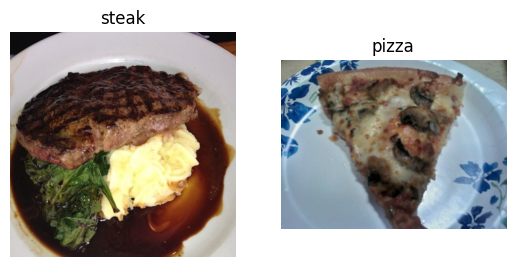

In [20]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


2. Preprocess the data (prepare it for a model)

One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data seperated into train and test directories with subfolders in each for each class.

To start we define the training and test directory paths.


In [21]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"



Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

    10,000 images (or more) might not fit into the memory of your processor (GPU).
    Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A batch size of 32 is good for your health.

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of ImageDataGenerator for each of our datasets.


In [22]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)



The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the rescale parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The rescale parameter, along with 1/255. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

    🔑 Note: For more transformation options such as data augmentation (we'll see this later), refer to the ImageDataGenerator documentation.

Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the flow_from_directory method.

In [23]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.




Wonderful! Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:

    Due to how our directories are structured, the classes get inferred by the subdirectory names in train_dir and test_dir.
    The target_size parameter defines the input size of our images in (height, width) format.
    The class_mode value of 'binary' defines our classification problem type. If we had more than two classes, we would use 'categorical'.
    The batch_size defines how many images will be in each batch, we've used 32 which is the same as the default.

We can take a look at our batched images and labels by inspecting the train_data object.


In [24]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [25]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

Due to our rescale parameter, the images are now in (224, 224, 3) shape tensors with values between 0 and 1.

In [26]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)


Due to the class_mode parameter being 'binary' our labels are either 0 (pizza) or 1 (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels.



3. Create a model (start with a baseline)

You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on ImageNet (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

    🔑 Note: In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In our case, let's take a smaller version of the model that can be found on the CNN explainer website (model_1 from above) and build a 3 layer convolutional neural network.

In [27]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [28]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, # filters is the number of sliding windows going across an inout (higher = more complex model)
         kernel_size=3, # the size of the sliding window going across an input
         strides=1, # the size of the step the silidng window takes across an input
         padding='valid', # if "same", output shape is same as input shape , if "valid", output shape gets compressed
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])



Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output

Let's discuss some of the components of the Conv2D layer:

    The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
    filters - these are the number of "feature extractors" that will be moving over our images.
    kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
    stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
    padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

A feature can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these features are not defined by us, instead, the model learns them as it applies different filters across the image.

    📖 Resources: For a great demonstration of these in action, be sure to spend some time going through the following:

    CNN Explainer Webpage - a great visual overview of many of the concepts we're replicating here with code.
    A guide to convolutional arithmetic for deep learning - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
    For a great explanation of padding, see this Stack Overflow answer.

Now our model is ready, let's compile it.

In [29]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])



Since we're working on a binary classification problem (pizza vs. steak), the loss function we're using is 'binary_crossentropy', if it was mult-iclass, we might use something like 'categorical_crossentropy'.

Adam with all the default settings is our optimizer and our evaluation metric is accuracy.


4. Fit a model

Our model is compiled, time to fit it.

You'll notice two new parameters here:

    steps_per_epoch - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
    validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [30]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [32]:
# Fit the model
history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 6s 135ms/step - loss: 0.3278 - accuracy: 0.8647 - val_loss: 0.4271 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 6s 126ms/step - loss: 0.1998 - accuracy: 0.9393 - val_loss: 0.4173 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 8s 161ms/step - loss: 0.0765 - accuracy: 0.9833 - val_loss: 0.4163 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.0256 - accuracy: 0.9960 - val_loss: 0.4625 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 7s 141ms/step - loss: 0.0081 - accuracy: 0.9993 - val_loss: 0.5966 - val_accuracy: 0.7980


In [33]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 123ms/step - loss: 0.3293 - accuracy: 0.8580


[0.3292698264122009, 0.8579999804496765]

In [34]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### 5. Evaluating our model


<Axes: >

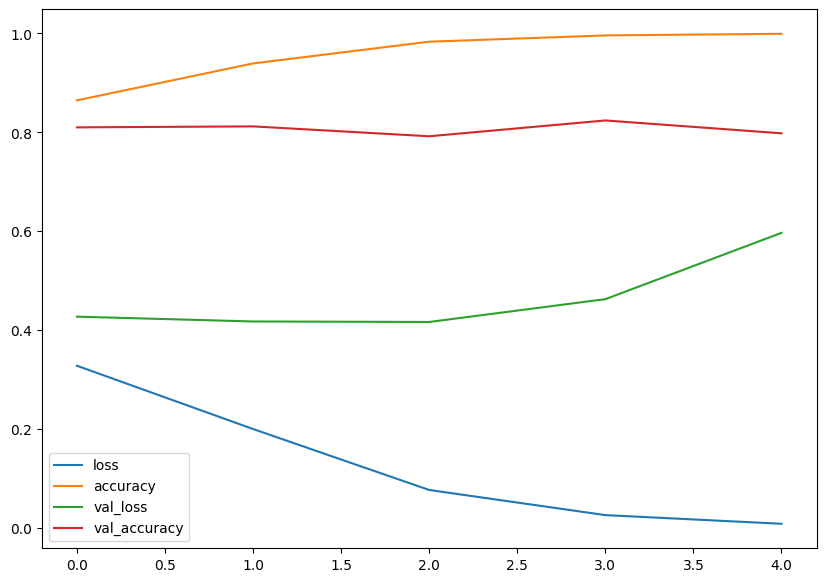

In [35]:
# Let's Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))



Hmm, judging by our loss curves, it looks like our model is overfitting the training dataset.

**Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.**



In [37]:
# Plot the validation and training curves seperatley
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history['accuracy']
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # PLot the accuracy
  plt.figure()
  plt.plot(accuracy,loss,label="training_accuracy")
  plt.plot(accuracy,val_loss,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

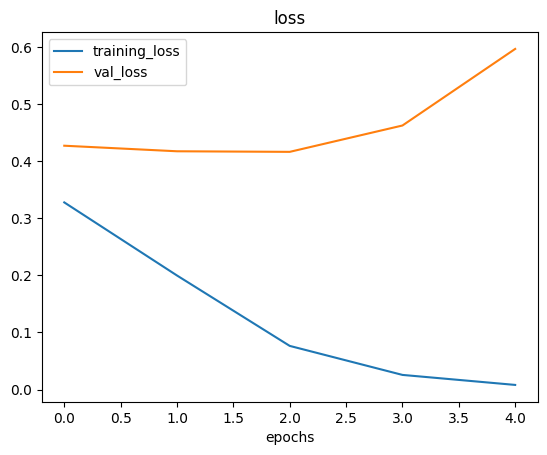

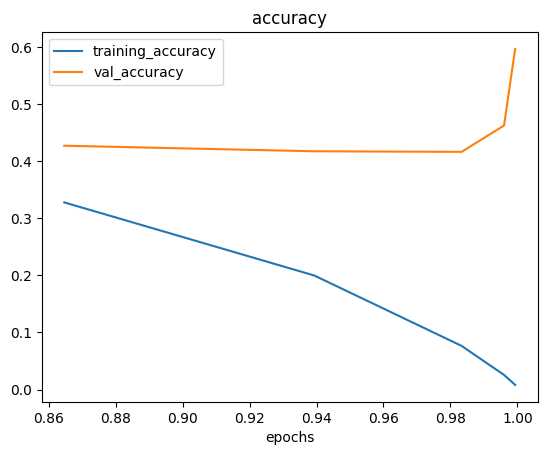

In [38]:
# check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:** Ideally the two loss curves (training and validation) will be very similar to each other(training loss and validation loss decreasing at similar rates), hwen there are large differences your model may be overfitting

### 6. Adjusting the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce Overfitting

Ways to induce Overfitting:
* Increse the number of conv layers
* Increse the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce Overfitting

* Add data augmentation
* Add regularization layers(Such as Maxpool2D)
* Add more data .....

> **Note:** Reducing overfitting is also know as **Regularization**
But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:

    A ConvNet with max pooling
    A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:

Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output


In [40]:
# Create the model(this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [41]:
# COmpile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [42]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 170ms/step - loss: 0.6015 - accuracy: 0.6713 - val_loss: 0.4824 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 7s 148ms/step - loss: 0.4760 - accuracy: 0.7860 - val_loss: 0.3618 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4154 - accuracy: 0.8127 - val_loss: 0.3962 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3935 - accuracy: 0.8340 - val_loss: 0.3311 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 6s 135ms/step - loss: 0.3633 - accuracy: 0.8487 - val_loss: 0.3275 - val_accuracy: 0.8620


In [43]:
# Get a summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [44]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


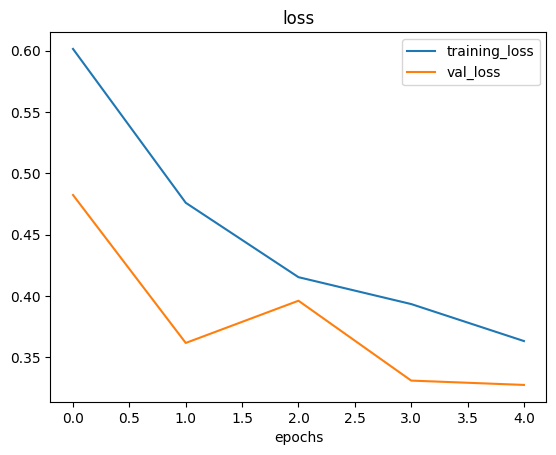

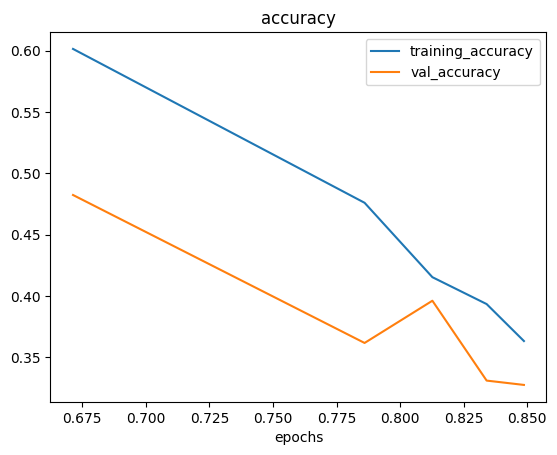

In [45]:
# Plot the loss curves
plot_loss_curves(history_5)

### Data Augumentation

In [51]:
# create ImaegDataGenerator training instance with data augumentation
train_datagen_augumented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range = 0.2, # how much do you want to rotate an image?
                                              shear_range=0.2, # how much do you want to shear an image
                                              zoom_range=0.2, # zoom in randomly on an image
                                              width_shift_range=0.2, # move your image around on the x-axis
                                              height_shift_range=0.3, # move your image around on the y-ais
                                              horizontal_flip=True) # do you want to flip an image ?

# Create ImageDataGenerator with data augumentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator withour data augumentation
test_datagen = ImageDataGenerator(rescale=1/255.)



    🤔 Question: What's data augmentation?

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

    🔑 Note: Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.



In [48]:


# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augumented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')



Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [49]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

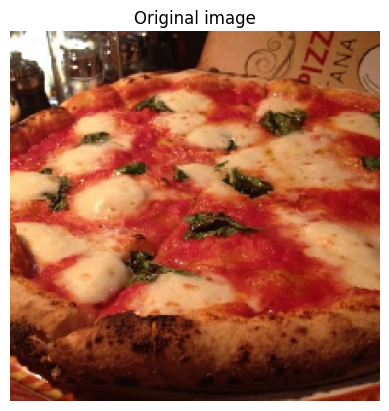

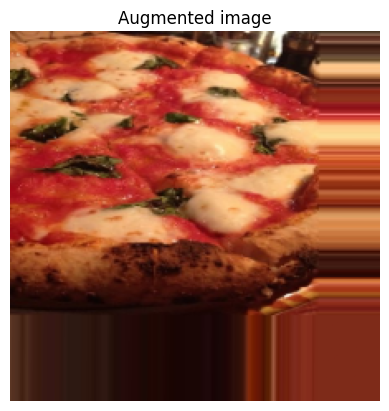

In [50]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);



After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images.

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.

    🤔 Question: Should I use data augmentation? And how much should I augment?

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the ImageDataGenerator class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as model_5.


In [53]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 23s 453ms/step - loss: 0.7463 - accuracy: 0.5847 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 23s 492ms/step - loss: 0.6925 - accuracy: 0.5353 - val_loss: 0.6415 - val_accuracy: 0.6180
Epoch 3/5
47/47 [==============================] - 23s 491ms/step - loss: 0.7000 - accuracy: 0.5727 - val_loss: 0.6189 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6569 - accuracy: 0.6040 - val_loss: 0.5333 - val_accuracy: 0.7480
Epoch 5/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6153 - accuracy: 0.6720 - val_loss: 0.5076 - val_accuracy: 0.8160




    🤔 Question: Why didn't our model get very good results on the training set to begin with?

It's because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time.

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set shuffle=False for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting shuffle=True on future data generators.

You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).

This is because the ImageDataGenerator instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

    🔑 Note: One possible method to speed up dataset manipulation would be to look into TensorFlow's parrallel reads and buffered prefecting options.



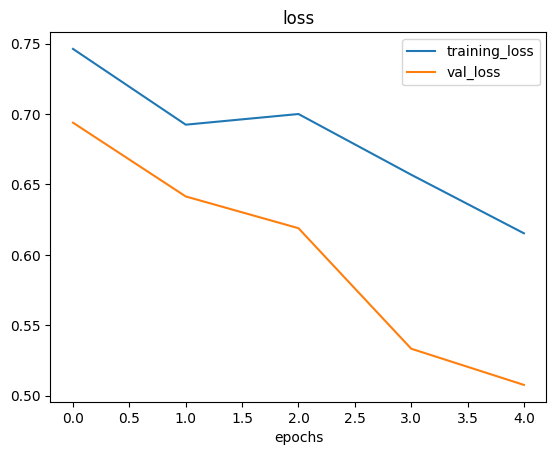

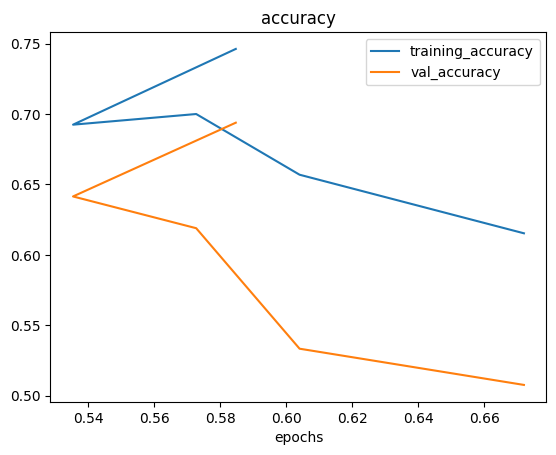

In [54]:
# Check our model curves
plot_loss_curves(history_6)

In [55]:
train_data_augumented_shuffle = train_datagen_augumented.flow_from_directory(train_dir,
                                                                             target_size=(224,224),
                                                                             batch_size=32,
                                                                             class_mode="binary",
                                                                             shuffle=True)

Found 1500 images belonging to 2 classes.


In [56]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augumented_shuffle, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augumented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 24s 475ms/step - loss: 0.6582 - accuracy: 0.6060 - val_loss: 0.5032 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5770 - accuracy: 0.7047 - val_loss: 0.5601 - val_accuracy: 0.7260
Epoch 3/5
47/47 [==============================] - 21s 446ms/step - loss: 0.5441 - accuracy: 0.7467 - val_loss: 0.4259 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 21s 456ms/step - loss: 0.5138 - accuracy: 0.7593 - val_loss: 0.3778 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 21s 439ms/step - loss: 0.5441 - accuracy: 0.7320 - val_loss: 0.4312 - val_accuracy: 0.8440


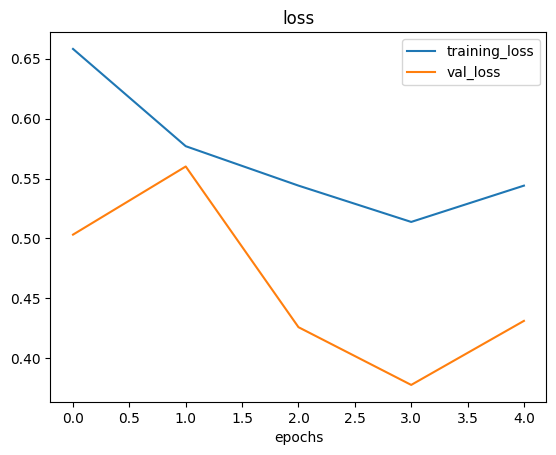

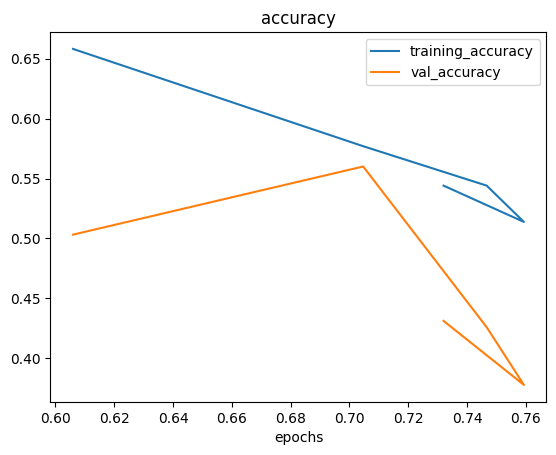

In [57]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)